<a href="https://colab.research.google.com/github/LeoRP-12/aprendizado-supervisionado/blob/main/Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo do uso do modelo de Árvore de Decisão

Este notebook foi utilizado para apresentar o modelo de árvore de decisão e alguns conceitos principais no desenvolvimento de Ciência de dados.

In [ ]:
from sklearn.datasets import load_wine as wine_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score 

In [ ]:
wine_dataset = wine_dataset()

In [ ]:
print(wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

# Exploratory Data Analysis (EDA)

In [ ]:
wine_dataframe = pd.DataFrame(data= np.c_[wine_dataset['data'], wine_dataset['target']],
                     columns= wine_dataset['feature_names'] + ['target'])

In [ ]:
wine_dataframe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [ ]:
wine_dataframe["target"].value_counts(normalize=True)

1.0    0.398876
0.0    0.331461
2.0    0.269663
Name: target, dtype: float64

In [ ]:
wine_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
wine_dataframe.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
wine_dataframe.describe().loc[['min', 'max']].T

,min,max
alcohol,11.03,14.83
malic_acid,0.74,5.80
ash,1.36,3.23
alcalinity_of_ash,10.60,30.00
magnesium,70.00,162.00
total_phenols,0.98,3.88
flavanoids,0.34,5.08
nonflavanoid_phenols,0.13,0.66
proanthocyanins,0.41,3.58
color_intensity,1.28,13.00


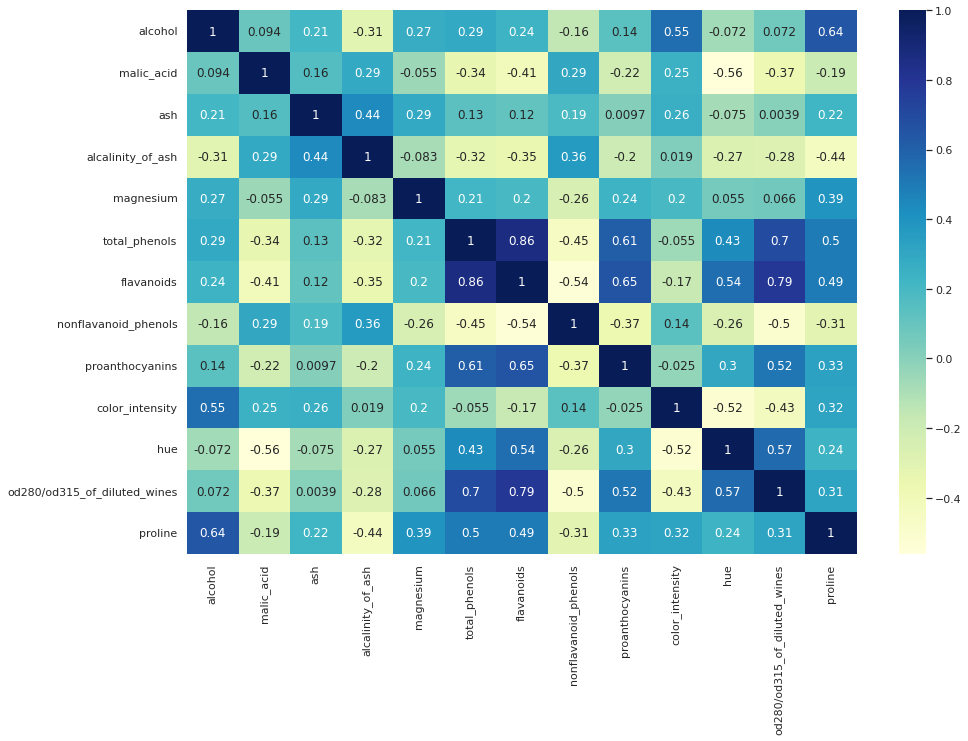

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(wine_dataframe.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

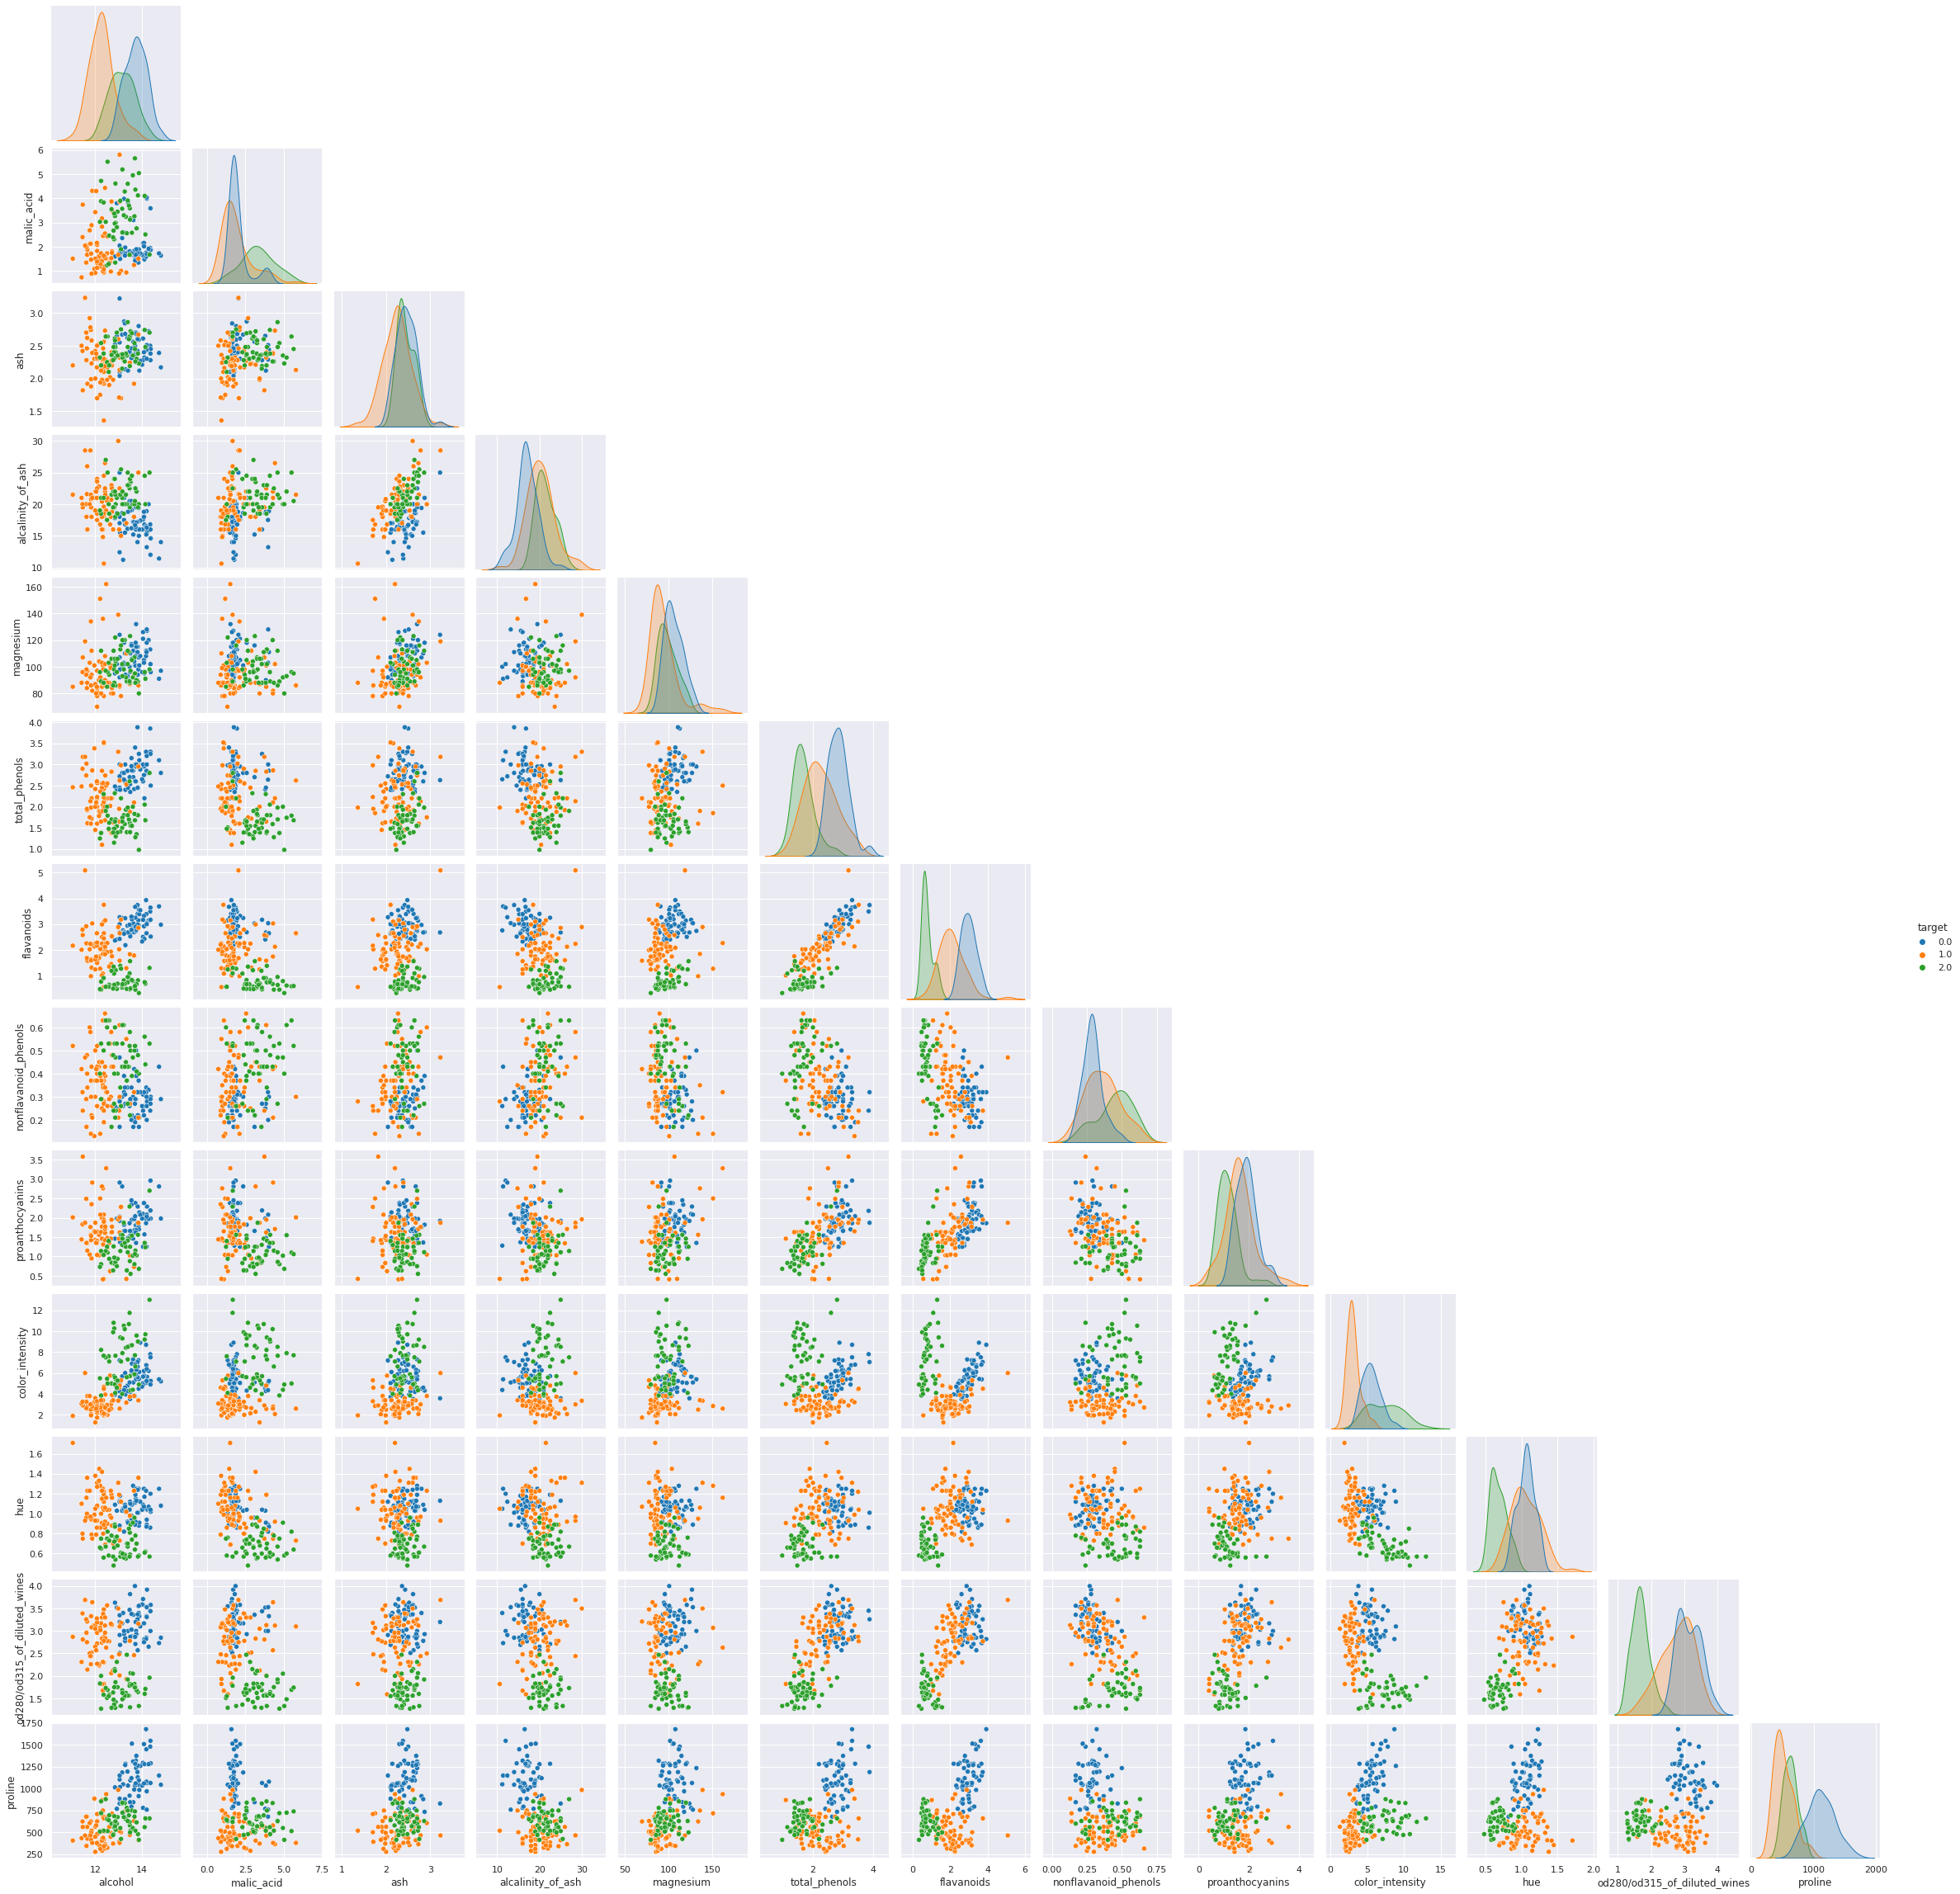

In [ ]:
sns.pairplot(wine_dataframe, 
             hue='target', 
             palette="tab10", 
             corner=True)

plt.show()

# Treino do Modelo

In [ ]:
X, y = wine_dataframe.drop("target", axis=1), wine_dataframe["target"]

## Datasets de Treino, Validação e Teste 

Ao criar um modelo de aprendizado supervisionado, nosso objetivo é aprender padrões em dados históricos para que estes possam ser aplicados para prever dados futuros e não disponíveis no momento. Porém, como vamos avaliar o quão bom o modelo vai performar se os dados são futuros?

Para resolver esse problema, é necessário também usar os dados históricos para avaliar o modelo. Isto traz outro problema visto que é fácil para um modelo realizar previsões sobre dados já vistos no treino. Portanto, é necessário separar os registros em diferentes grupos. São eles os conjuntos de treino, validação e teste.

* **Conjunto de treino**: amostras usadas para realizar o ajuste dos modelos. Ele aprende os padrões destes dados e ajusta seus parâmetros de acordo.
* **Conjunto de validação**: amostras usadas para providenciar uma avaliação não enviesada dos modelos que foram treinados usando o conjunto de treino. Utilizado com o objetivo de selecionarmos o melhor algoritmo, combinação de hiperparâmetros e features para o problema. A avaliação se torna enviesada à medida que as caracteristicas do dataset de validação é incorporado na configuração do modelo.
* **Conjunto de teste**: amostras usadas para providenciar uma avaliação não enviesada do **modelo final** treinado no dataset de treino. Utilizado para sabermos qual será o erro do modelo final quando estiver em produção. Também chamado de *holdout set*.

O dataset de treino é de mais fácil compreensão. Mas por que usar conjuntos de validação e teste?

A resposta se resume aos diversos testes que iremos realizar para chegarmos no modelo ótimo. Uma vez que cada algoritmo (k-NN, regressão logística, árvores de decisão, etc) possui vários hiperparâmetros, deve-se testar diferentes combinações de seus valores para obter o melhor modelo possível. Para fazer isso, treina-se modelos com diferentes combinações dos hiperparâmetros no conjunto de treino e então eles são avaliados no conjunto de validação, escolhendo a combinação que resulta na melhor métrica. Consequentemente, o modelo final fica um pouco enviesado pelos dados do conjunto de validação, mesmo que eles não tenham sido usados na fase de treino propriamente dita. Desta forma, faz-se necessário a separação de um terceiro conjunto de dados, o de teste, sob o qual o modelo deve ser novamente avaliado para que uma métrica não enviesada da performance do modelo possa ser estabelecida. Para bons modelos, é esperado que o erro no conjunto de teste não esteja tão distante do conjunto de validação. 

### Validação Cruzada (Cross Validation)

Uma questão que pode ser levantada é sobre como dividir as observações em cada um dos conjuntos. O que ocorre caso deixemos uma parte importante dos dados fora do dataset de treino de forma que o modelo não aprenda padrões úteis? Para ajudar nisso, existe a chamada validação cruzada (cross validation).

**Cross validation** é uma técnica de split de treino e validação que assegura que cada observação é usada tanto para o treino quanto para a validação. Existe mais de uma maneira de realizá-la, são as técnicas:

- Kfolds
- Leave-One-Out
- Hold-Out
- Bootstrap

Atenção: a validação cruzada trata apenas da separação entre os conjuntos de treino e validação e assume que já exista um conjunto isolado de observações para o teste.

Usando a imagem abaixo como referência, em cada uma das variáveis, temos:

- **X_test** e **y_test**: conjunto de teste (vermelho)
- **X_training** e **y_training**: conjunto auxiliar de treino (verde superior) para o método de holdout (com validação cruzada)
- **X_train** e **y_train**: conjunto de treino (verde inferior) para treino sem validação cruzada
- **X_val** e **y_val**: conjunto de validação (amarelo) para avaliar os modelos sem validação cruzada

<img src="https://cdn-images-1.medium.com/max/1200/1*4G__SV580CxFj78o9yUXuQ.png" alt="cv" style="width: 600px;"/>

In [ ]:
# Setar seed para obter resultados reproduziveis
seed = 10

# Usar train_test_split para criar o conjunto de teste
# random_state é o estado inicial usado para geração de números aleatórios, garantindo que em todos os testes ocorra a mesma divisão dos dados
# test_size define o tamanho do conjunto de teste, em porcentagem
# stratify é usado para garantir a mesma proporção da variável resposta nos conjuntos
X_training, X_test, y_training, y_test = train_test_split(X, y, random_state=seed, test_size=0.25, stratify=y)
# Como saída, temos a porção de treino e teste para as variáveis X e Y

print("Test set X", X_test.shape)
print("Test set y", y_test.shape)

Test set X (45, 13)
Test set y (45,)


In [ ]:
# Mesmo procedimento, mas para o conjunto de treino resultante
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, random_state=seed,
                                                  test_size=0.33, stratify=y_training)

print("Train set X", X_train.shape)
print("Train set y", y_train.shape)
print("Validation set X", X_val.shape)
print("Validation set y", y_val.shape)

Train set X (89, 13)
Train set y (89,)
Validation set X (44, 13)
Validation set y (44,)


In [ ]:
model = DecisionTreeClassifier(random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)


# Modelos Underffited e Overfitted

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" alt="cv" style="width: 600px;"/>



Acurácia no conjunto de treino: 1.000
Acurácia no conjunto de validação: 0.932
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.94      0.88      0.91        17
         2.0       0.86      1.00      0.92        12

    accuracy                           0.93        44
   macro avg       0.93      0.94      0.93        44
weighted avg       0.94      0.93      0.93        44



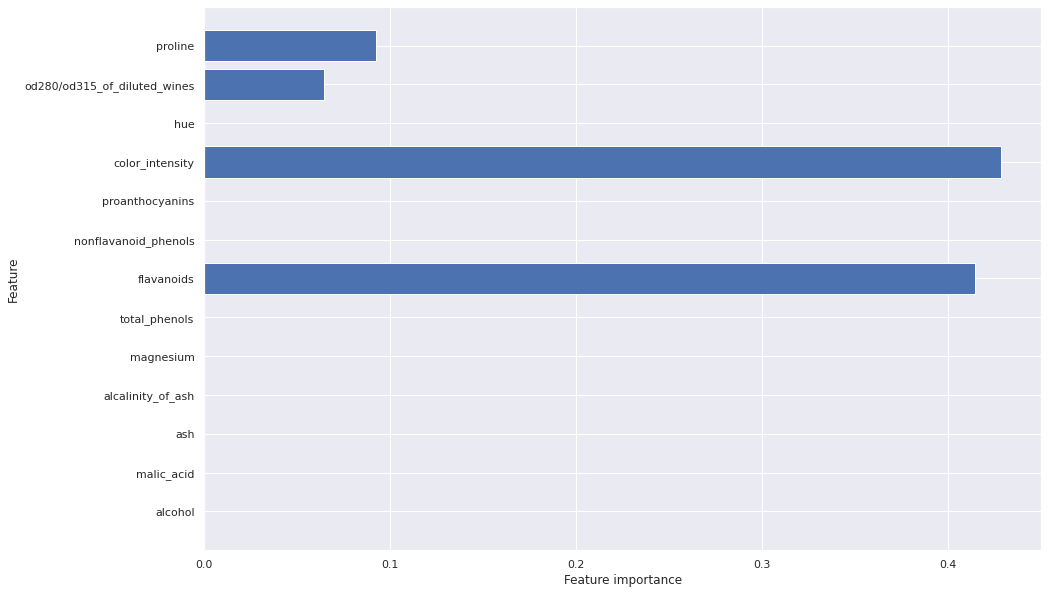

In [ ]:
# Calcular e printar métricas

# A função score da nossa árvore calcula a acurácia, tendo como entradas as variáveis X e y e, por trás, essa função gerará o y previsto e irá comparar com o y real (variável y_train, por exemplo)
print("Acurácia no conjunto de treino: {:.3f}".format(model.score(X_train, y_train)))
print("Acurácia no conjunto de validação: {:.3f}".format(model.score(X_val, y_val)))

# O classification report traz diversas métricas interessantes, en formato de tabela, de forma simples
print(classification_report(y_val, y_pred))

# Plotar importância das features
# Avalia quão importante é cada variável para as decisões que a árvore fornece
# Corresponde a um número entre 0 e 1 para cada feature, onde 0 significa não usada e 1
# "perfeitamente prevê a resposta". A importância das features sempre somam 1
def plot_feature_importances(model):
    # Listando features
    n_features = wine_dataset.data.shape[1]
    # Gráfico de barras horizontal a partir da importância de cada features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    # Adiciona o ticks, ou traços no eixo Y
    plt.yticks(np.arange(n_features), wine_dataset.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(model)

# Predição

In [ ]:
x_to_predict = X_test.loc[[15]]
y_real = y_test.loc[[15]]

In [ ]:
y_predicted = model.predict(x_to_predict)

In [ ]:
y_predicted[0]

0.0

In [ ]:
y_real

0.0